## **Importing all required libraries**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import numpy as np

## **Loading MNIST dataset, reshape and one-hot encode labels**

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

# Reshape to (N, 28, 28, 1) so Conv2D expects the correct input shape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert integer labels to one-hot encoded vectors
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


## **Displaying random samples from the training set**

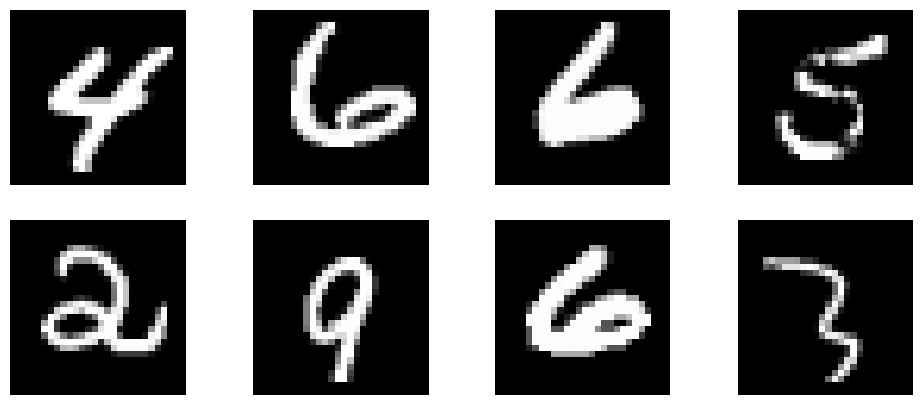

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind, :, :, 0], cmap='gray')
  plt.axis('off')

## **Defining the CNN model**

In [ ]:
# Architecture: Conv2D (ReLU), MaxPooling2D, Flatten, Dense(10, softmax)
def build_model(num_filters=16, learning_rate=0.001):
  model = models.Sequential()
  #define filters and convolutional layers here
  model.add(layers.Conv2D(filters=num_filters, kernel_size=(3, 3),
  activation='relu', input_shape=(28, 28, 1)))
  #Add a maxpooling layer
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  #Flatten the output and give it to a fully connected layer
  model.add(layers.Flatten())
  #one hidden layer maps the flattened neurons to output
  model.add(layers.Dense(10, activation ='softmax'))
  #compile with Adam optimizer and categorical cross-entropy loss
  model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

## **Perform 5-fold stratified cross-validation**

In [ ]:
# Test different filter sizes and learning rates and then pick best one based on mean validation accuracy
filters_list = [16, 32]
lr_list = [0.001, 0.01]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_cfg = None
best_score = -1.0

epochs = 3
batch_size = 128

for num_filters in filters_list:
    for lr in lr_list:
        scores = []
        print(f"\nConfig: filters={num_filters}, lr={lr}")
        for fold_idx, (train_ix, val_ix) in enumerate(skf.split(X_train, y_train), start=1):
            # Split training data for this fold
            X_tr, X_val = X_train[train_ix], X_train[val_ix]
            y_tr, y_val = y_train_encoded[train_ix], y_train_encoded[val_ix]
            # Build, train, and evaluate model
            model = build_model(num_filters=num_filters, learning_rate=lr)
            model.fit(X_tr, y_tr, epochs=3, batch_size=128,validation_data=(X_val, y_val), verbose=0)
            _, acc = model.evaluate(X_val, y_val, verbose=0)
            scores.append(acc)
            print(f"  Fold {fold_idx}: val_acc={acc:.4f}")
        # Calculate mean and std validation accuracy
        mean_acc = float(np.mean(scores))
        std_acc  = float(np.std(scores))
        print(f"Mean val_acc: {mean_acc:.4f} (+/- {std_acc:.4f})")
        if mean_acc > best_score:
            best_score = mean_acc
            best_cfg = (num_filters, lr)

print(f"\nBest config: filters={best_cfg[0]}, lr={best_cfg[1]} (mean val_acc={best_score:.4f})")



Config: filters=16, lr=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 1: val_acc=0.9646
  Fold 2: val_acc=0.9614
  Fold 3: val_acc=0.9709
  Fold 4: val_acc=0.9668
  Fold 5: val_acc=0.9648
Mean val_acc: 0.9657 (+/- 0.0031)

Config: filters=16, lr=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 1: val_acc=0.9488
  Fold 2: val_acc=0.9474
  Fold 3: val_acc=0.9518
  Fold 4: val_acc=0.9486
  Fold 5: val_acc=0.9417
Mean val_acc: 0.9476 (+/- 0.0033)

Config: filters=32, lr=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 1: val_acc=0.9725
  Fold 2: val_acc=0.9685
  Fold 3: val_acc=0.9722
  Fold 4: val_acc=0.9713
  Fold 5: val_acc=0.9704
Mean val_acc: 0.9710 (+/- 0.0014)

Config: filters=32, lr=0.01


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 1: val_acc=0.9524
  Fold 2: val_acc=0.9506
  Fold 3: val_acc=0.9515
  Fold 4: val_acc=0.9459
  Fold 5: val_acc=0.9429
Mean val_acc: 0.9487 (+/- 0.0036)

Best config: filters=32, lr=0.001 (mean val_acc=0.9710)


## **Retrain best configuration on full training set**

In [ ]:
# Rebuild model with the best hyperparameters
best_model = build_model(num_filters=best_cfg[0], learning_rate=best_cfg[1])
# Train on the full training set
best_model.fit(X_train, y_train_encoded, epochs=5, batch_size=128, verbose=1)
# Evaluate performance on the held-out test set
test_loss, test_acc = best_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8579 - loss: 2.8035
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9719 - loss: 0.1360
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9824 - loss: 0.0667
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9854 - loss: 0.0480
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9907 - loss: 0.0287

Final Test Accuracy: 0.9754


# **Final Report**

## **CNN Architecture**
This lab's CNN is a compact model inspired by LeNet architecture designed for 28×28×1 grayscale MNIST digit images. It begins with a single Conv2D layer with a 3×3 kernel and ReLU activation. This layer introduces nonlinearity and captures local edges and curves. One of the most critical hyperparameters, the number of filters for this layer, is set to either 16 or 32. Next is a 2×2 MaxPooling layer which halves the spatial dimensions and provides computational efficiency and helps to introduce translation invariance. The output of the pooling layer is flattened to a 1-D vector and sent to a Dense layer with 10 output neurons for the 10 digit classes with a softmax activation, which provides the predicted probabilities for each class. The network is trained with the Adam optimizer, is set to measure accuracy, and the loss is categorical cross-entropy. The design is lightweight and passes the MNIST classification task reasonably well, as it captures the necessary spatial patterns with simple computational resources.

## **Parameter Exploration Procedure**

We used stratified 5-fold cross-validation to assess the model on the training data and determine the optimal set of hyperparameters while preserving class balance in each fold. For each parameter set, a model was trained for 3 epochs on a batch size of 128 samples per batch, and the validation accuracy for the held-out fold was obtained. Hyperparameters considered were the number of filters in the convolutional layer (16 and 32) and the learning rate for the Adam optimizer (0.001 and 0.01). For each configuration, the validation accuracy across the folds was averaged, and the one with the highest mean accuracy was selected. The test set was not used during cross validation.

## **Results and Final Evaluation**
While performing 5-fold stratified cross validation, four combinations of hyperparameters were analyzed to identify the best performing model. Setting the hyperparameters to 16 filters and a 0.001 learning rate, the model produced a mean validation accuracy of 0.9657 ± 0.0031. When the learning rate was raised to 0.01, the mean accuracy dropped slightly to 0.9476 ± 0.0033. Using 32 filters further increased mean validation accuracy to 0.9710 ± 0.0014 for a learning rate of 0.001, while a learning rate of 0.01 again reduced the mean to 0.9487 ± 0.0036. As a result, the configuration with 32 filters and a learning rate of 0.001 was chosen. It was then retrained from scratch on the entire 60,000-image training set for 5 epochs with a batch size of 128, yielding a final test accuracy of 0.9754 on the 10,000-image test set. These results indicate that the selected configuration was consistent with the results obtained during cross validation and generalised well to unseen data.

## **Comparison with Other Papers on MNIST**

When using more complex architectures and fine-tuned hyperparameters, more recent studies using Convolutional Neural Networks on the MNIST data set accomplishes test accuracies in the range of 99% and even higher. One CNN with hyperparameter tuning claims to have achieved a 99.40% test accuracy [1]. Another CNN that combines CNN features with classical methods claims to have achieved a 99.30% accuracy on MNIST [2]. Unlike these models, our lightweight, single-convolution model (which had no data normalization or augmentation) achieved 97.54% test accuracy after 5 epochs. This was lower than these stronger baselines, but it is expected given the less complex model and more limited training conditions. These references contextualize our performance relative to commonly reported MNIST baselines [1][2].

## **References**

[1] H. Shao, E. Ma, M. Zhu, X. Deng, and S. Zhai, “MNIST Handwritten Digit Classification Based on Convolutional Neural Network with Hyperparameter Optimization,” Intelligent Automation & Soft Computing, vol. 36, no. 3, pp. 3595–3606, 2023.

[2] S. S. Ullah, Li Gang, M. Riaz, A. Ashfaq, S. Khan, and S. Khan, “Handwritten Digit Recognition: An Ensemble-Based Approach for Superior Performance,” arXiv preprint arXiv:2503.06104, 2025.

ECE 449 Lab 3 PDF and Presentation

https://lekhuyen.medium.com/lenet-and-mnist-handwritten-digit-classification-354f5646c590
